# IMPORT DATA

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sb
import csv
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ridge_regression
from sklearn.cross_validation import train_test_split
from sklearn.metrics.classification import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import random
from sklearn import metrics
from sklearn import preprocessing

In [2]:
DefaultData = pd.read_csv("/Users/muratyalcin/Desktop/Data Science/Upwork/6/bank-additional-full.csv", sep=";")

# EXPLORATORY ANALYSIS

In [3]:
DefaultData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

Since categorical variables are string, we need to convert them to into numeric

In [4]:
#Encoding and deleting the attributes which are not required. Encoding was done just to check the model.
le = preprocessing.LabelEncoder()

le.fit(DefaultData['job'])
DefaultData['job']=le.transform(DefaultData['job'])
DefaultData['job'] = DefaultData['job'].astype('category')

le.fit(DefaultData['marital'])
DefaultData['marital']=le.transform(DefaultData['marital'])
DefaultData['marital'] = DefaultData['marital'].astype('category')

le.fit(DefaultData['default'])
DefaultData['default']=le.transform(DefaultData['default'])
DefaultData['default'] = DefaultData['default'].astype('category')

le.fit(DefaultData['housing'])
DefaultData['housing']=le.transform(DefaultData['housing'])
DefaultData['housing'] = DefaultData['housing'].astype('category')

le.fit(DefaultData['loan'])
DefaultData['loan']=le.transform(DefaultData['loan'])
DefaultData['loan'] = DefaultData['loan'].astype('category')

le.fit(DefaultData['education'])
DefaultData['education']=le.transform(DefaultData['education'])
DefaultData['education'] = DefaultData['education'].astype('category')

le.fit(DefaultData['contact'])
DefaultData['contact']=le.transform(DefaultData['contact'])
DefaultData['contact'] = DefaultData['contact'].astype('category')

le.fit(DefaultData['month'])
DefaultData['month']=le.transform(DefaultData['month'])
DefaultData['month'] = DefaultData['month'].astype('category')

le.fit(DefaultData['day_of_week'])
DefaultData['day_of_week']=le.transform(DefaultData['day_of_week'])
DefaultData['day_of_week'] = DefaultData['day_of_week'].astype('category')

le.fit(DefaultData['poutcome'])
DefaultData['poutcome']=le.transform(DefaultData['poutcome'])
DefaultData['poutcome'] = DefaultData['poutcome'].astype('category')

le.fit(DefaultData['y'])
DefaultData['y']=le.transform(DefaultData['y'])
y=DefaultData['y']
#del DefaultData['y']

In [5]:
DefaultData.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [6]:
DefaultData.isnull().values.sum()

0

We don't have missing values. It's good.

Since there is a big difference between mean and median of the "duration", it is skewed. We may need to apply log transformation. 

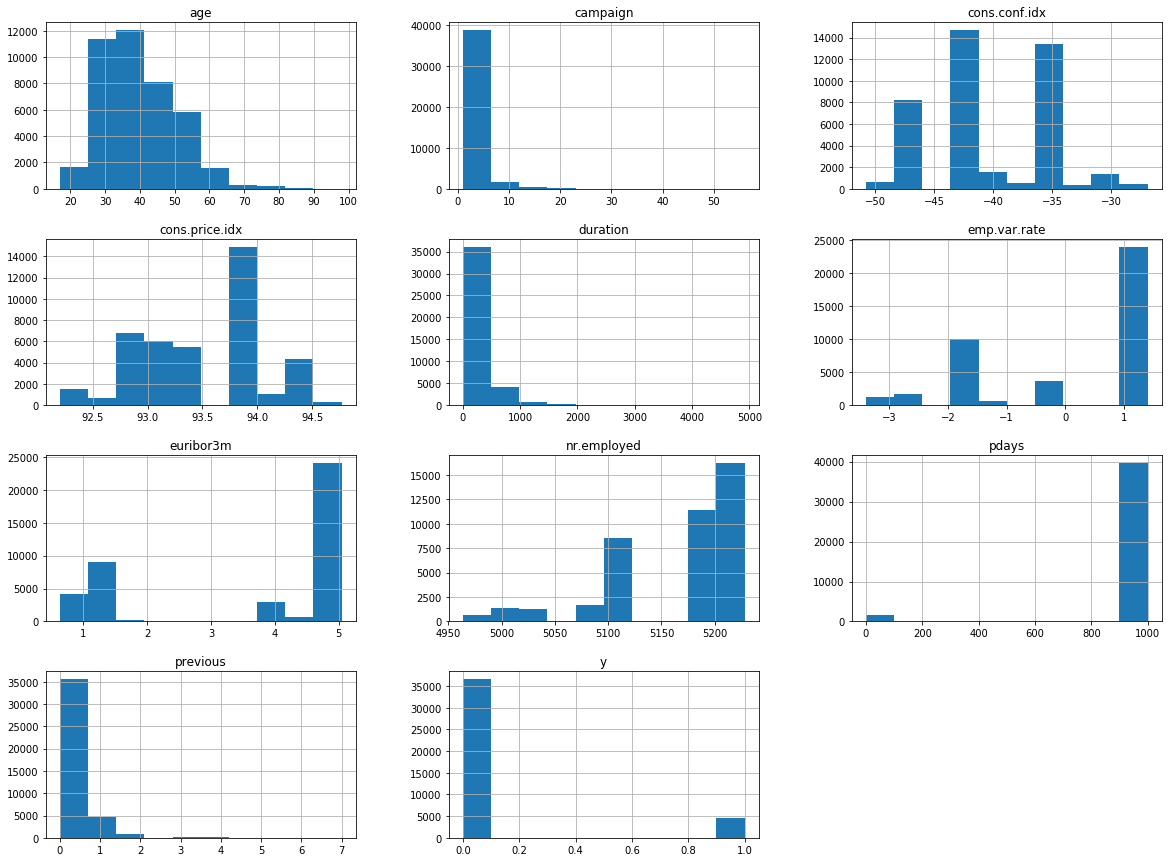

In [7]:
DefaultData.hist(bins=10, figsize = (20,15))
plt.show()

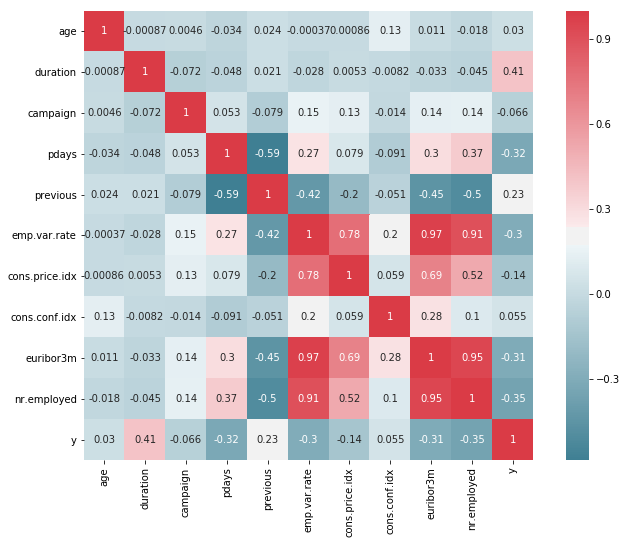

In [8]:
corr=DefaultData.corr()
corr
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sb.heatmap(corr,annot = True, mask=np.zeros_like(corr, dtype=np.bool), cmap=sb.diverging_palette(220, 10, as_cmap=True),square=True)
plt.show()

To prevent multicollinearity, we need to take out highly correlated predictors
Also, duration is a biased predictor and needs to be excluded from data

In [9]:
DefaultData = DefaultData.drop(['cons.price.idx','emp.var.rate','nr.employed','duration'],axis=1)

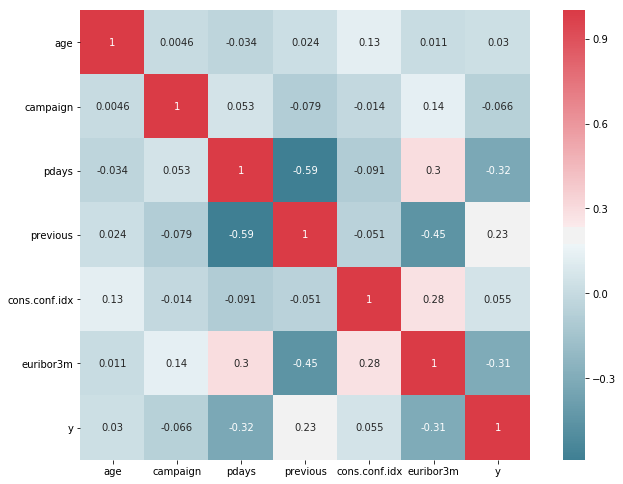

In [10]:
corr=DefaultData.corr()
corr
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sb.heatmap(corr,annot = True, mask=np.zeros_like(corr, dtype=np.bool), cmap=sb.diverging_palette(220, 10, as_cmap=True),square=True)
plt.show()

previous and pdays %60 correlated. So let's take out pdays as well

In [11]:
DefaultData = DefaultData.drop(['pdays'],axis=1)

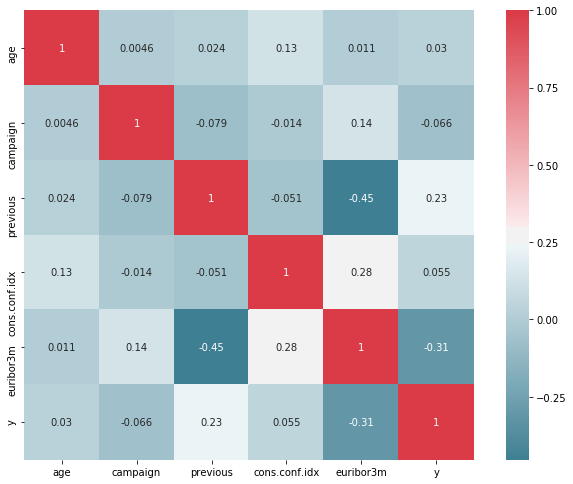

In [12]:
corr=DefaultData.corr()
corr
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sb.heatmap(corr,annot = True, mask=np.zeros_like(corr, dtype=np.bool), cmap=sb.diverging_palette(220, 10, as_cmap=True),square=True)
plt.show()

Now we don't need to worry about multicollinearity

Let's look at the uniques values of each features to get insight of the data

In [13]:
for features in DefaultData:
    #print(features)
    print(features,':\n' ,DefaultData[features].unique())

age :
 [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job :
 [3, 7, 0, 1, 9, ..., 10, 6, 11, 2, 8]
Length: 12
Categories (12, int64): [3, 7, 0, 1, ..., 6, 11, 2, 8]
marital :
 [1, 2, 0, 3]
Categories (4, int64): [1, 2, 0, 3]
education :
 [0, 3, 1, 2, 5, 7, 6, 4]
Categories (8, int64): [0, 3, 1, 2, 5, 7, 6, 4]
default :
 [0, 1, 2]
Categories (3, int64): [0, 1, 2]
housing :
 [0, 2, 1]
Categories (3, int64): [0, 2, 1]
loan :
 [0, 2, 1]
Categories (3, int64): [0, 2, 1]
contact :
 [1, 0]
Categories (2, int64): [1, 0]
month :
 [6, 4, 3, 1, 8, 7, 2, 5, 0, 9]
Categories (10, int64): [6, 4, 3, 1, ..., 2, 5, 0, 9]
day_of_week :
 [1, 3, 4, 2, 0]
Categories (5, int64): [1, 3, 4, 2, 0]
campaign :
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 3

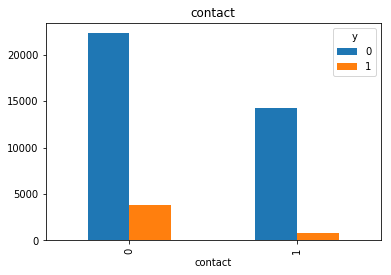

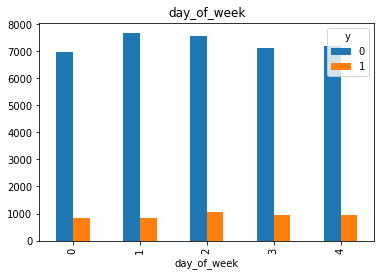

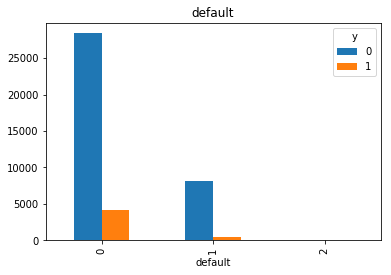

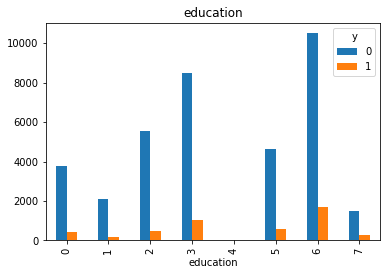

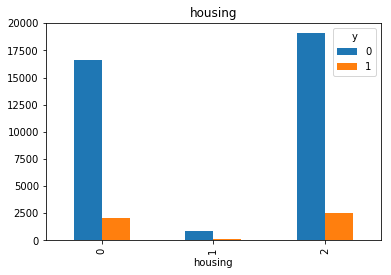

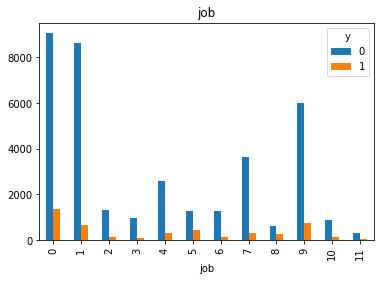

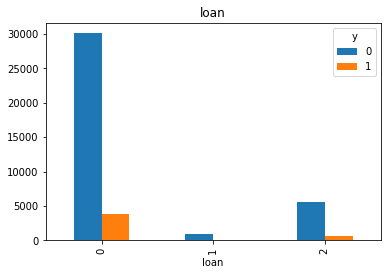

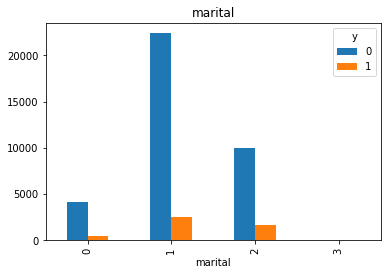

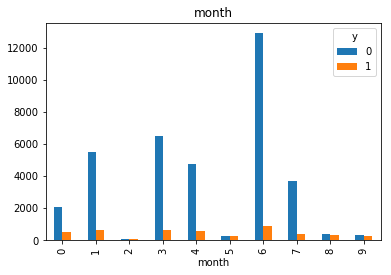

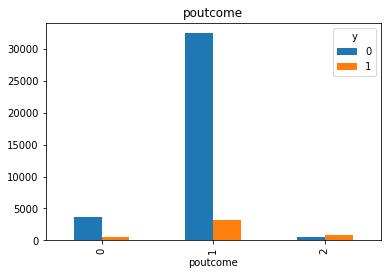

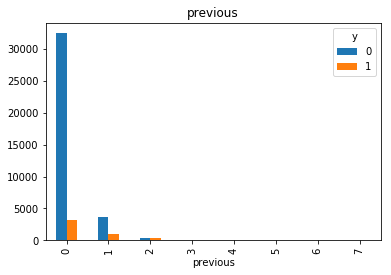

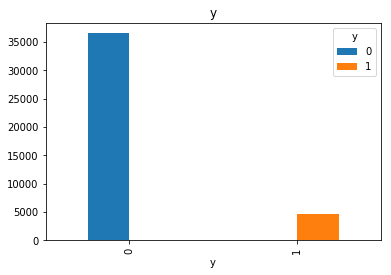

In [14]:
data = DefaultData[DefaultData.columns.difference(['cons.conf.idx','euribor3m', 'pdays','campaign','age','duration'])]
for i,x in enumerate(data):
    #print(i,x)
    data.groupby([x,'y']).y.count().unstack([1])\
    .plot(kind = 'bar', title = str(x))

In [13]:
del DefaultData['y']

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus

In [17]:
X_train, X_test, y_train, y_test = train_test_split(DefaultData,y,test_size=0.2,random_state=42)

In [18]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predi = dtree.predict(X_test)
np.mean(predi == y_test)

0.8309055596018451

In [19]:
Xvar = DefaultData.columns

In [159]:
'''
dot_data = tree.export_graphviz(dtree, out_file=None, 
                         feature_names=Xvar,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('CART.png')
graph.write_svg("CART.svg")
'''

True

# SPLIT DATA INTO TRAINING AND TEST SET

In [14]:
#creating training and testing set (80% and 20%), where y is the class variable
#splitting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(DefaultData,y,test_size=0.2,random_state=42)

# LOGISTIC REGRESSION CLASSIFIER

Accuracy is  0.8969410050983249
[[7224   79]
 [ 770  165]]


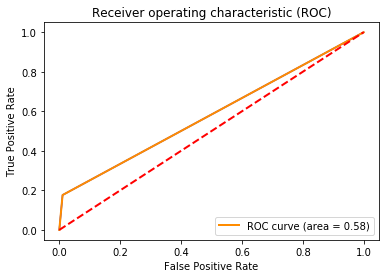

In [15]:

model=LogisticRegression(penalty="l1",C=1)
model.fit(X_train,y_train)
y_predi=pd.DataFrame(model.predict(X_test))
print('Accuracy is ',accuracy_score(y_test,y_predi))

#plotting ROC curve and AUC score and confusion matrix
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predi,pos_label=1)
roc_auc = auc(fpr, tpr)

print(confusion_matrix(y_test, y_predi))

plt.plot(fpr,tpr, 'b')
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('Receiver operating characteristic (ROC)')

plt.show()



In [16]:
lr_accy = round(accuracy_score(y_test, y_predi), 3)
print (lr_accy,"\n")
lrconfmat = confusion_matrix(y_test,y_predi)
print(lrconfmat,"\n")
lrrep = classification_report(y_test, y_predi)
print(lrrep)

0.897 

[[7224   79]
 [ 770  165]] 

             precision    recall  f1-score   support

          0       0.90      0.99      0.94      7303
          1       0.68      0.18      0.28       935

avg / total       0.88      0.90      0.87      8238



# SVM CLASSIFIER

In [17]:
from sklearn.svm import SVC

In [38]:
clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train)

/Users/muratyalcin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
y_predi=pd.DataFrame(clf.predict(X_test))

In [40]:
svm_accy = round(accuracy_score(y_test, y_predi), 3)
print (svm_accy,"\n")
svmconfmat = confusion_matrix(y_test,y_predi)
print(svmconfmat ,"\n")
svmrep = classification_report(y_test, y_predi)
print(svmrep)

0.894 

[[7182  121]
 [ 751  184]] 

             precision    recall  f1-score   support

          0       0.91      0.98      0.94      7303
          1       0.60      0.20      0.30       935

avg / total       0.87      0.89      0.87      8238



# NN CLASSIFIER

In [21]:
import neurolab as nl

In [22]:
mins = X_train.min(axis=0)
maxs = X_train.max(axis=0)


In [23]:
le = preprocessing.LabelEncoder()

le.fit(mins)
mins=le.transform(mins)

le.fit(maxs)
maxs=le.transform(maxs)

In [24]:
a=[]
for i in range(len(mins)):
    #print(i)
    a.append([mins[i],maxs[i]])
    
print(a)
len(a)

[[4, 10], [1, 8], [1, 3], [1, 6], [1, 2], [1, 2], [1, 2], [1, 1], [1, 7], [1, 4], [3, 9], [1, 6], [1, 2], [0, 0], [2, 5]]


15

In [25]:
perceptron = nl.net.newp(a,1)

In [26]:
y_train=pd.DataFrame(y_train)
y_train.shape

(32950, 1)

In [27]:
err = perceptron.train(X_train, y_train, epochs=15, show = 5, lr = 0.01)

Epoch: 5; Error: 1846.5;
Epoch: 10; Error: 1842.5;
Epoch: 15; Error: 1846.5;
The maximum number of train epochs is reached


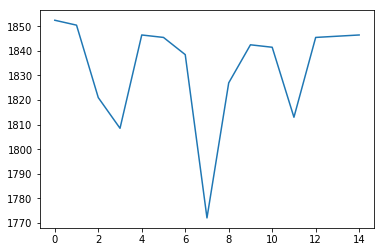

In [28]:
plt.plot(err)

In [29]:
y_predi = perceptron.sim(X_test)

In [30]:
percep_accy = round(accuracy_score(y_test, y_predi), 3)
print (percep_accy,"\n")
percepconfmat = confusion_matrix(y_test,y_predi)
print(percepconfmat ,"\n")
perceprep = classification_report(y_test, y_predi)
print(perceprep)

0.887 

[[7301    2]
 [ 932    3]] 

             precision    recall  f1-score   support

          0       0.89      1.00      0.94      7303
          1       0.60      0.00      0.01       935

avg / total       0.85      0.89      0.83      8238



# MULTI LAYER NET

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
from sklearn.neural_network import MLPClassifier

In [63]:
mlp = MLPClassifier(hidden_layer_sizes=(10,20,10,30,40,20,20,5,20))

In [64]:
mlp.fit(X_train, y_train)

/Users/muratyalcin/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 20, 10, 30, 40, 20, 20, 5, 20),
       learning_rate='constant', learning_rate_init=0.001, max_iter=200,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [65]:
y_predi = mlp.predict(X_test)

In [66]:
nn_accy = round(accuracy_score(y_test, y_predi), 3)
print (nn_accy,"\n")
nnconfmat = confusion_matrix(y_test,y_predi)
print(nnconfmat,"\n")
nnrep = classification_report(y_test, y_predi)
print(nnrep)

0.894 

[[7143  160]
 [ 713  222]] 

             precision    recall  f1-score   support

          0       0.91      0.98      0.94      7303
          1       0.58      0.24      0.34       935

avg / total       0.87      0.89      0.87      8238



In [67]:
print('Logistic Regression : \n', '\n accuracy : \n',lr_accy ,'\n', '\n report: \n' , lrrep )
print('SVM : \n', '\n accuracy : \n',svm_accy ,'\n', '\n report: \n' , svmrep )
print('NN Perceptron : \n', '\n accuracy : \n',percep_accy ,'\n', '\n report: \n' , perceprep )
print('Multi Layer NN : \n', '\n accuracy : \n', nn_accy ,'\n', '\n report: \n' , nnrep )

Logistic Regression : 
 
 accuracy : 
 0.897 
 
 report: 
              precision    recall  f1-score   support

          0       0.90      0.99      0.94      7303
          1       0.68      0.18      0.28       935

avg / total       0.88      0.90      0.87      8238

SVM : 
 
 accuracy : 
 0.894 
 
 report: 
              precision    recall  f1-score   support

          0       0.91      0.98      0.94      7303
          1       0.60      0.20      0.30       935

avg / total       0.87      0.89      0.87      8238

NN Perceptron : 
 
 accuracy : 
 0.887 
 
 report: 
              precision    recall  f1-score   support

          0       0.89      1.00      0.94      7303
          1       0.60      0.00      0.01       935

avg / total       0.85      0.89      0.83      8238

Multi Layer NN : 
 
 accuracy : 
 0.894 
 
 report: 
              precision    recall  f1-score   support

          0       0.91      0.98      0.94      7303
          1       0.58      0.24      0

Accuracy and the f1 score are almost the same with logistic regression and NN. In this particular problem, we are concerned about True Positive rate. Because we don't want to miss any customer who will be positive to telemarketing. Telemarketing someone who is not going to accept credit deposit, does not cost much. However losing the person who is going to accept credit deposit is loss of the opportunity. That's why from these 3 models, choosing the highest recall rate will be benefitial. (Accuracy and F1 are the same)